In [2]:
import pandas as pd, numpy as np
import logomaker
from modules.gkm_to_pwm import *

In [2]:
exp = pd.read_csv('ctcf_ml_datasets/ls-gkm/gkmexp_pos_impscores.txt', sep='\t', header=None, names=['seq_id', 'total_score', 'base_contrib'])
exp

,seq_id,total_score,base_contrib
0,Chr20:209112-209162,0.687623,"0,0,-0.00430696,0;0,0,-0.0058605,0;0,-0.001097..."
1,Chr20:267130-267180,0.329949,"0,0,-0.00485222,0;0,0,0,-0.00224563;0,0,-0.008..."
2,Chr20:290750-290800,0.217206,"0,0,0.00285889,0;0,0.00208094,0,0;0,0.00659347..."
3,Chr20:330740-330790,1.162030,"0,0,0,0.00193958;0,0,0.00279447,0;0,0,0.004610..."
4,Chr20:354618-354668,2.034350,"0,0,0.000939664,0;0.00139033,0,0,0;0,0,0.01349..."
...,...,...,...
395,ChrX:14039481-14039531,0.764577,"-0.00271244,0,0,0;0,0,-0.00227391,0;0,-0.00491..."
396,ChrX:14095821-14095871,0.996715,"0,0,0,-0.000562098;0,0,0,0.00166636;0,0,0.0084..."
397,ChrX:14528864-14528914,-0.248347,"0,0.00541292,0,0;0,0,0,0.00487365;0,0,0,0.0026..."
398,ChrX:14697644-14697694,0.885247,"0.000541073,0,0,0;0,0.00856637,0,0;0,0,0,0.027..."


In [3]:
seqs = fa_dict('ctcf_ml_datasets/ls-gkm/test_pos.fa')

In [5]:
W, counts = aggregate_base_contribs_per_pos(exp, seqs, L=50)

In [6]:
counts[counts == 0] = 1
W /= counts

In [7]:
W -= W.mean(axis=1, keepdims=True)

In [8]:
PWM = softmax(W, beta=1.5)

In [9]:
PWM = 0.5 * (PWM + rc_pwm(PWM))

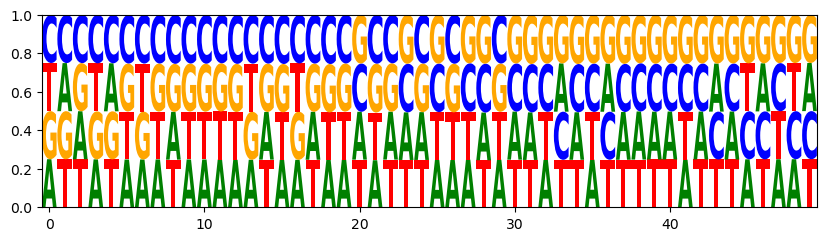

In [10]:
df = pd.DataFrame(PWM, columns=["A","C","G","T"])
logomaker.Logo(df);